In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd
import numpy as np
from importlib import reload

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #  library to Silhouette Coefficient

In [3]:
import utils
reload(utils)

Using TensorFlow backend.


<module 'utils' from 'C:\\Users\\Smit\\ds5230_2020_project\\utils.py'>

In [4]:
PROJECT_PATH = getcwd()
PICKLE_PATH = PROJECT_PATH + "\\pickles\\"

# Loading Train Images

In [5]:
train_images = utils.open_pickle(file = PICKLE_PATH + "train_images" )

In [6]:
IMG_DIMENSION = train_images[0].shape
IMG_DIMENSION

(80, 60, 3)

In [7]:
train_images = train_images.reshape((train_images.shape[0], IMG_DIMENSION[0]*IMG_DIMENSION[1]*IMG_DIMENSION[2]))

In [8]:
train_images = train_images/255.0 # normalizing image

In [9]:
print("Total images: %d"%train_images.shape[0])
print("Dimension of image before PCA Transformation: %d"%train_images.shape[1])

Total images: 10796
Dimension of image before PCA Transformation: 14400


# Loading PCA object and taking PCA transformation

In [10]:
optimal_metrics = utils.open_pickle(PICKLE_PATH + "optimal_metrics")
MAX_PCA_COMPONENTS = optimal_metrics['MAX_PCA_COMPONENTS']
pca_fit = utils.open_pickle(PICKLE_PATH + "pca_fit_"  + str(MAX_PCA_COMPONENTS) + '_components')

In [11]:
train_images = pca_fit.transform(train_images)

# Performing KMeans on PCA tranformed images

In [12]:
%%time
n_cluster_list = [i for i in range(8,17)] 
kmeans_fit = {}
for clusters in n_cluster_list:
    start_time = utils.get_time()
    print("---Fitting K-Means with %d clusters---"%clusters)
    kmeans = KMeans(n_clusters = clusters, 
                    n_init = 10, 
                    random_state = 40, 
                    verbose = 2,
                    n_jobs = -1)
    kmeans_fit[clusters] = kmeans.fit(train_images)
    time = utils.get_time() - start_time
    print("Time taken: %s minutes" %round(time.seconds/60,2)) 

---Fitting K-Means with 8 clusters---
Time taken: 0.22 minutes
---Fitting K-Means with 9 clusters---
Time taken: 0.18 minutes
---Fitting K-Means with 10 clusters---
Time taken: 0.18 minutes
---Fitting K-Means with 11 clusters---
Time taken: 0.22 minutes
---Fitting K-Means with 12 clusters---
Time taken: 0.27 minutes
---Fitting K-Means with 13 clusters---
Time taken: 0.22 minutes
---Fitting K-Means with 14 clusters---
Time taken: 0.22 minutes
---Fitting K-Means with 15 clusters---
Time taken: 0.22 minutes
---Fitting K-Means with 16 clusters---
Time taken: 0.23 minutes
Wall time: 2min 1s


Text(0, 0.5, 'Inertia')

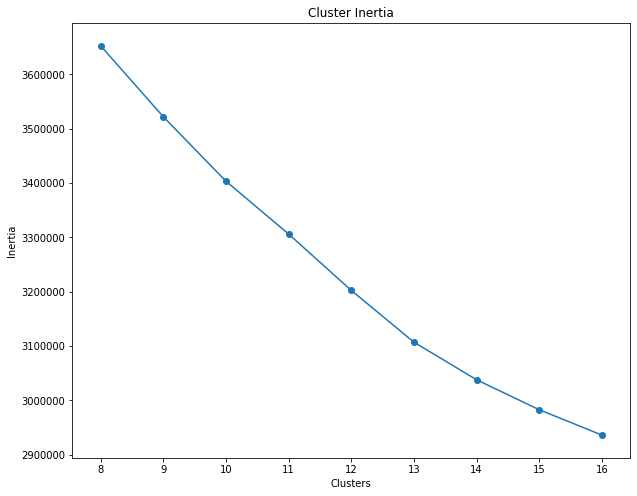

In [13]:
# Calculating inertia corresponding to different cluster values
k_means_inertias = {}
for clusters in n_cluster_list:
    k_means_inertias[clusters] = kmeans_fit[clusters].inertia_

plt.figure(figsize=(10,8))
plt.plot(n_cluster_list, [v for k, v in k_means_inertias.items()])
plt.scatter(n_cluster_list, [v for k, v in k_means_inertias.items()])
plt.title("Cluster Inertia")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

## Calculating Silhouette Score for all values of clusters

In [14]:
%%time
kmeans_ss = {}
for clusters in n_cluster_list:
    print("----- Calcualting Silhouette score with %d clusters (K-Means)"%clusters)
    kmeans_ss[clusters] = silhouette_score(train_images, labels=kmeans_fit[clusters].labels_)

----- Calcualting Silhouette score with 8 clusters (K-Means)
----- Calcualting Silhouette score with 9 clusters (K-Means)
----- Calcualting Silhouette score with 10 clusters (K-Means)
----- Calcualting Silhouette score with 11 clusters (K-Means)
----- Calcualting Silhouette score with 12 clusters (K-Means)
----- Calcualting Silhouette score with 13 clusters (K-Means)
----- Calcualting Silhouette score with 14 clusters (K-Means)
----- Calcualting Silhouette score with 15 clusters (K-Means)
----- Calcualting Silhouette score with 16 clusters (K-Means)
Wall time: 30 s


Text(0, 0.5, 'Silhouette Cofficient')

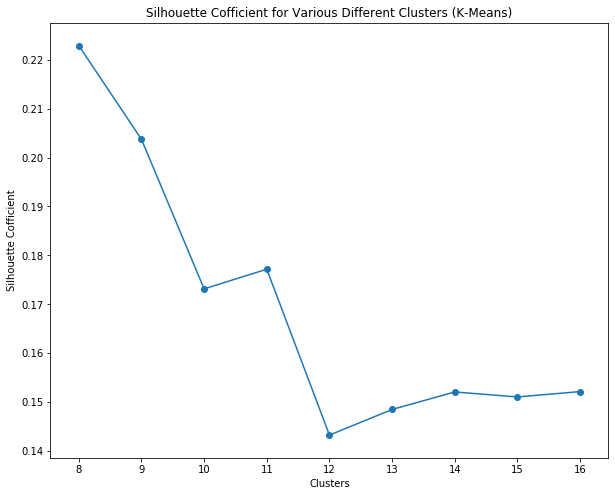

In [15]:
# for clusters in n_cluster_list:
#     print('Silhouette Cofficient for %d clusters (K-Means) on Plane image: %f'%(clusters, kmeans_ss[clusters]))
plt.figure(figsize=(10,8))
plt.plot(n_cluster_list, [v for k, v in kmeans_ss.items()])
plt.scatter(n_cluster_list, [v for k, v in kmeans_ss.items()])
plt.title("Silhouette Cofficient for Various Different Clusters (K-Means)")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Cofficient")

# Saving KMeans fit

In [16]:
N_CLUSTERS = 12
utils.save_pickle(PICKLE_PATH + "K-Means_PCA_%scomponents_%sclusters"%(str(MAX_PCA_COMPONENTS),str(N_CLUSTERS)), 
                  kmeans_fit[N_CLUSTERS])

Variable successfully saved in C:\Users\Smit\ds5230_2020_project\pickles\K-Means_PCA_145components_12clusters.pickle


In [17]:
try:
    optimal_metrics = utils.open_pickle(PICKLE_PATH + "optimal_metrics")
except: 
    optimal_metrics = {'K-MEANS_CLUSTERS': N_CLUSTERS}
    
optimal_metrics['K-MEANS_CLUSTERS'] = N_CLUSTERS
utils.save_pickle(PICKLE_PATH + "optimal_metrics", optimal_metrics)

Variable successfully saved in C:\Users\Smit\ds5230_2020_project\pickles\optimal_metrics.pickle
